In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('Loan_Default.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Ile jest brakujących danych w danej kolumnie

In [3]:
df.isnull().sum().sort_values(ascending=False)

Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
property_value               15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
age                            200
loan_purpose                   134
Neg_ammortization              121
term                            41
Region                           0
total_units                      0
Security_Type                    0
Status                           0
co-applicant_credit_type         0
Credit_Score                     0
credit_type                      0
ID                               0
Secured_by                       0
occupancy_type                   0
construction_type                0
year                             0
interest_only                    0
loan_amount                      0
business_or_commerci

In [4]:
df = df.drop('ID', axis =1)

In [5]:

numeryczne = [col for col in df.columns if df[col].dtypes != 'object']
nie_numeryczne = [col for col in df.columns if df[col].dtypes == 'object']

num_data, n_num_data = df, df
for col in nie_numeryczne:
    num_data = num_data.drop(col, axis=1)

for col in numeryczne:
    n_num_data = n_num_data.drop(col, axis=1)


### Korelacja danych

Text(0.5, 1.0, 'Koorelacja danych')

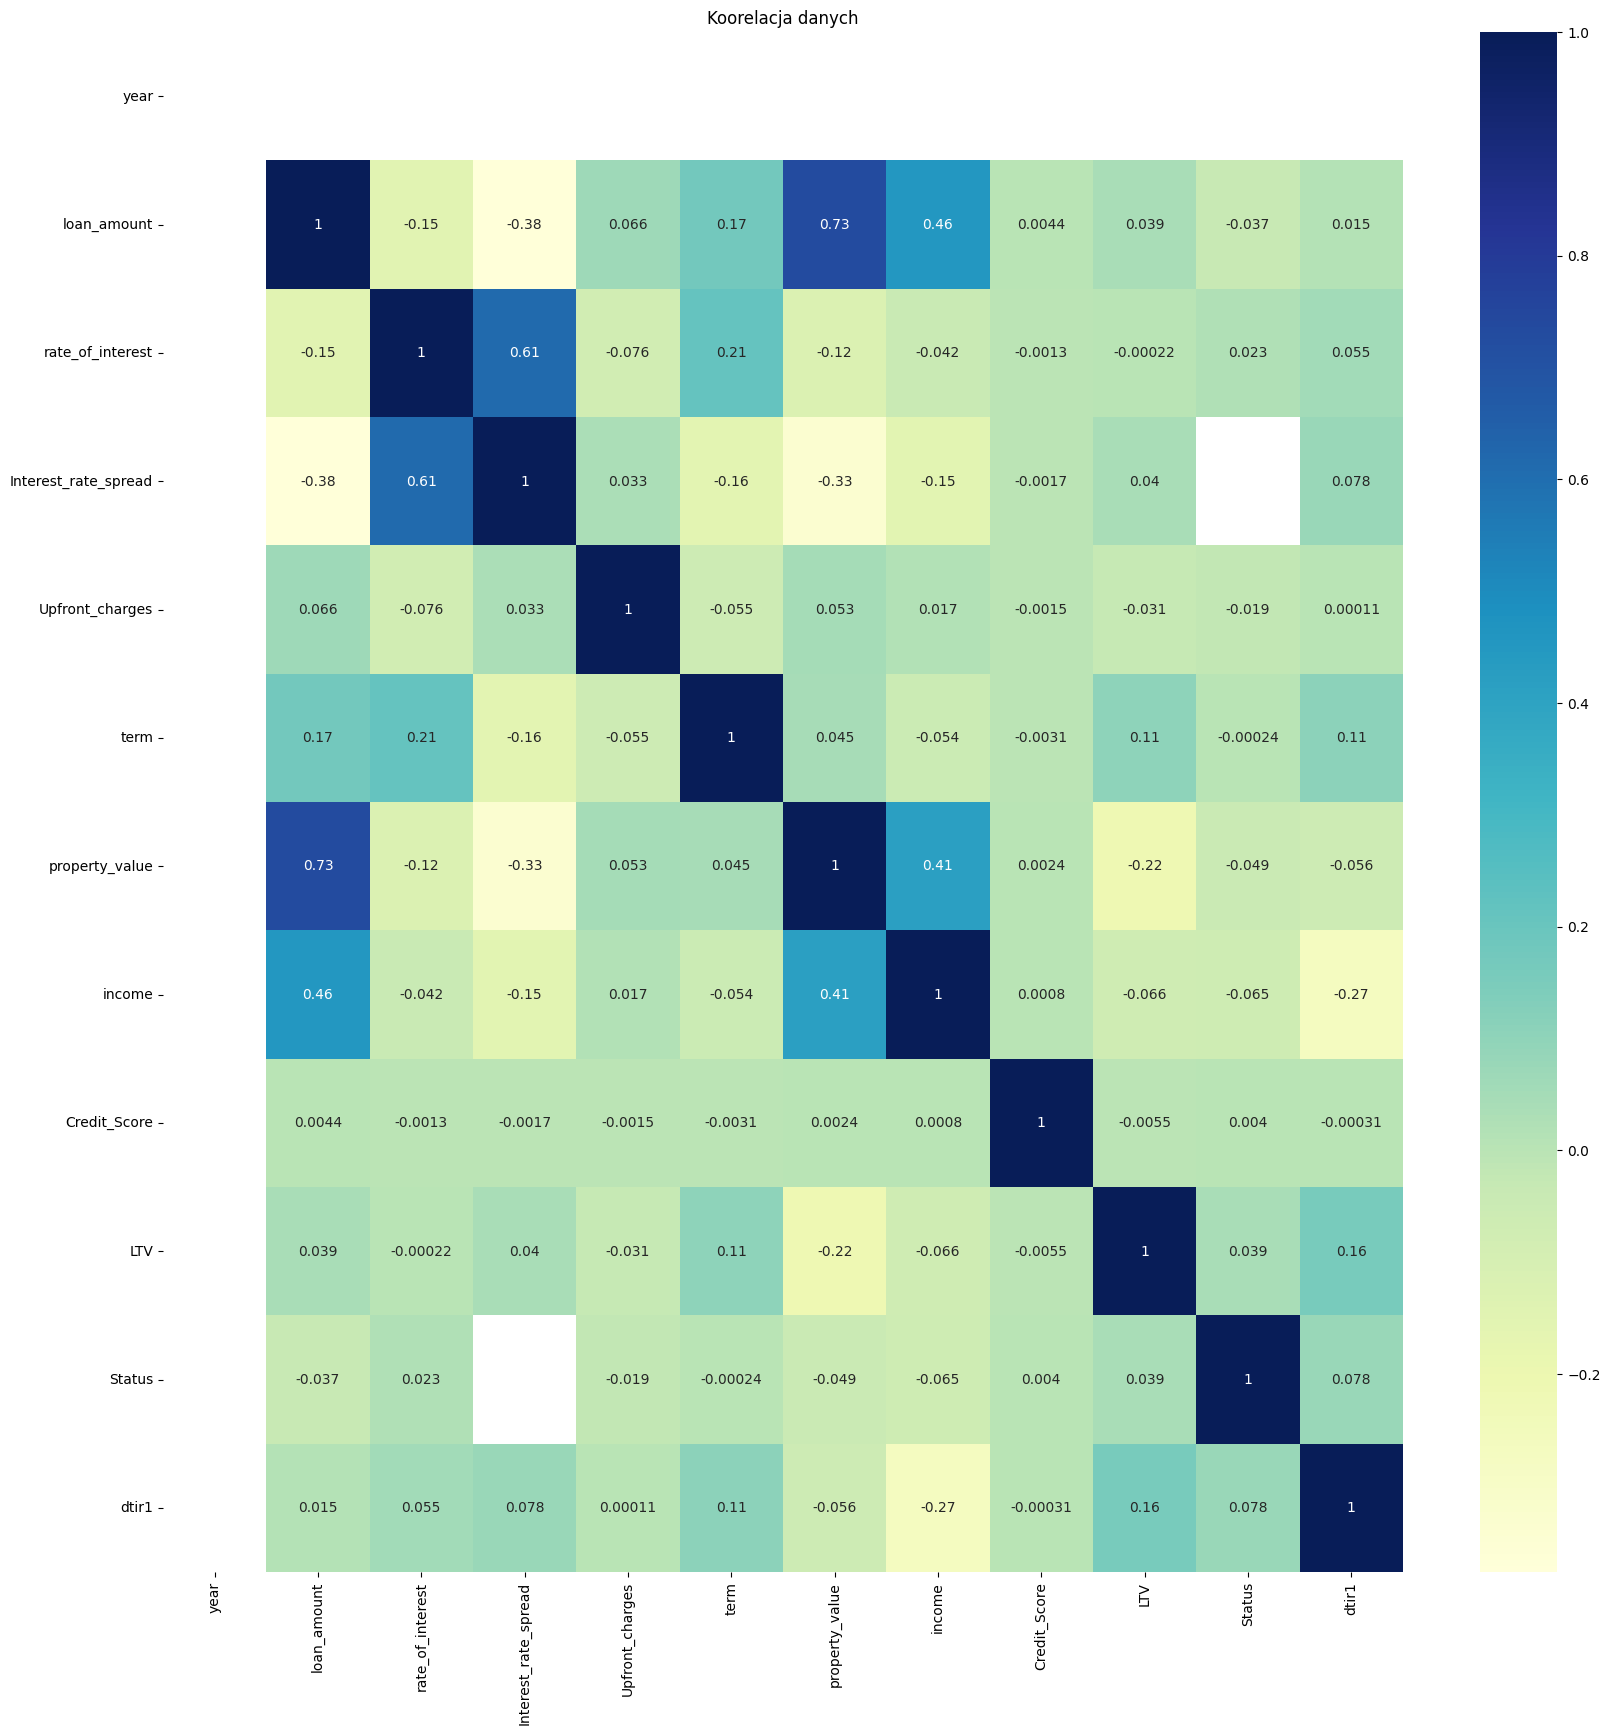

In [ ]:
corr_matrix = num_data.corr()


plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Korelacja danych')



### Histogramy ilości numerycznych danych

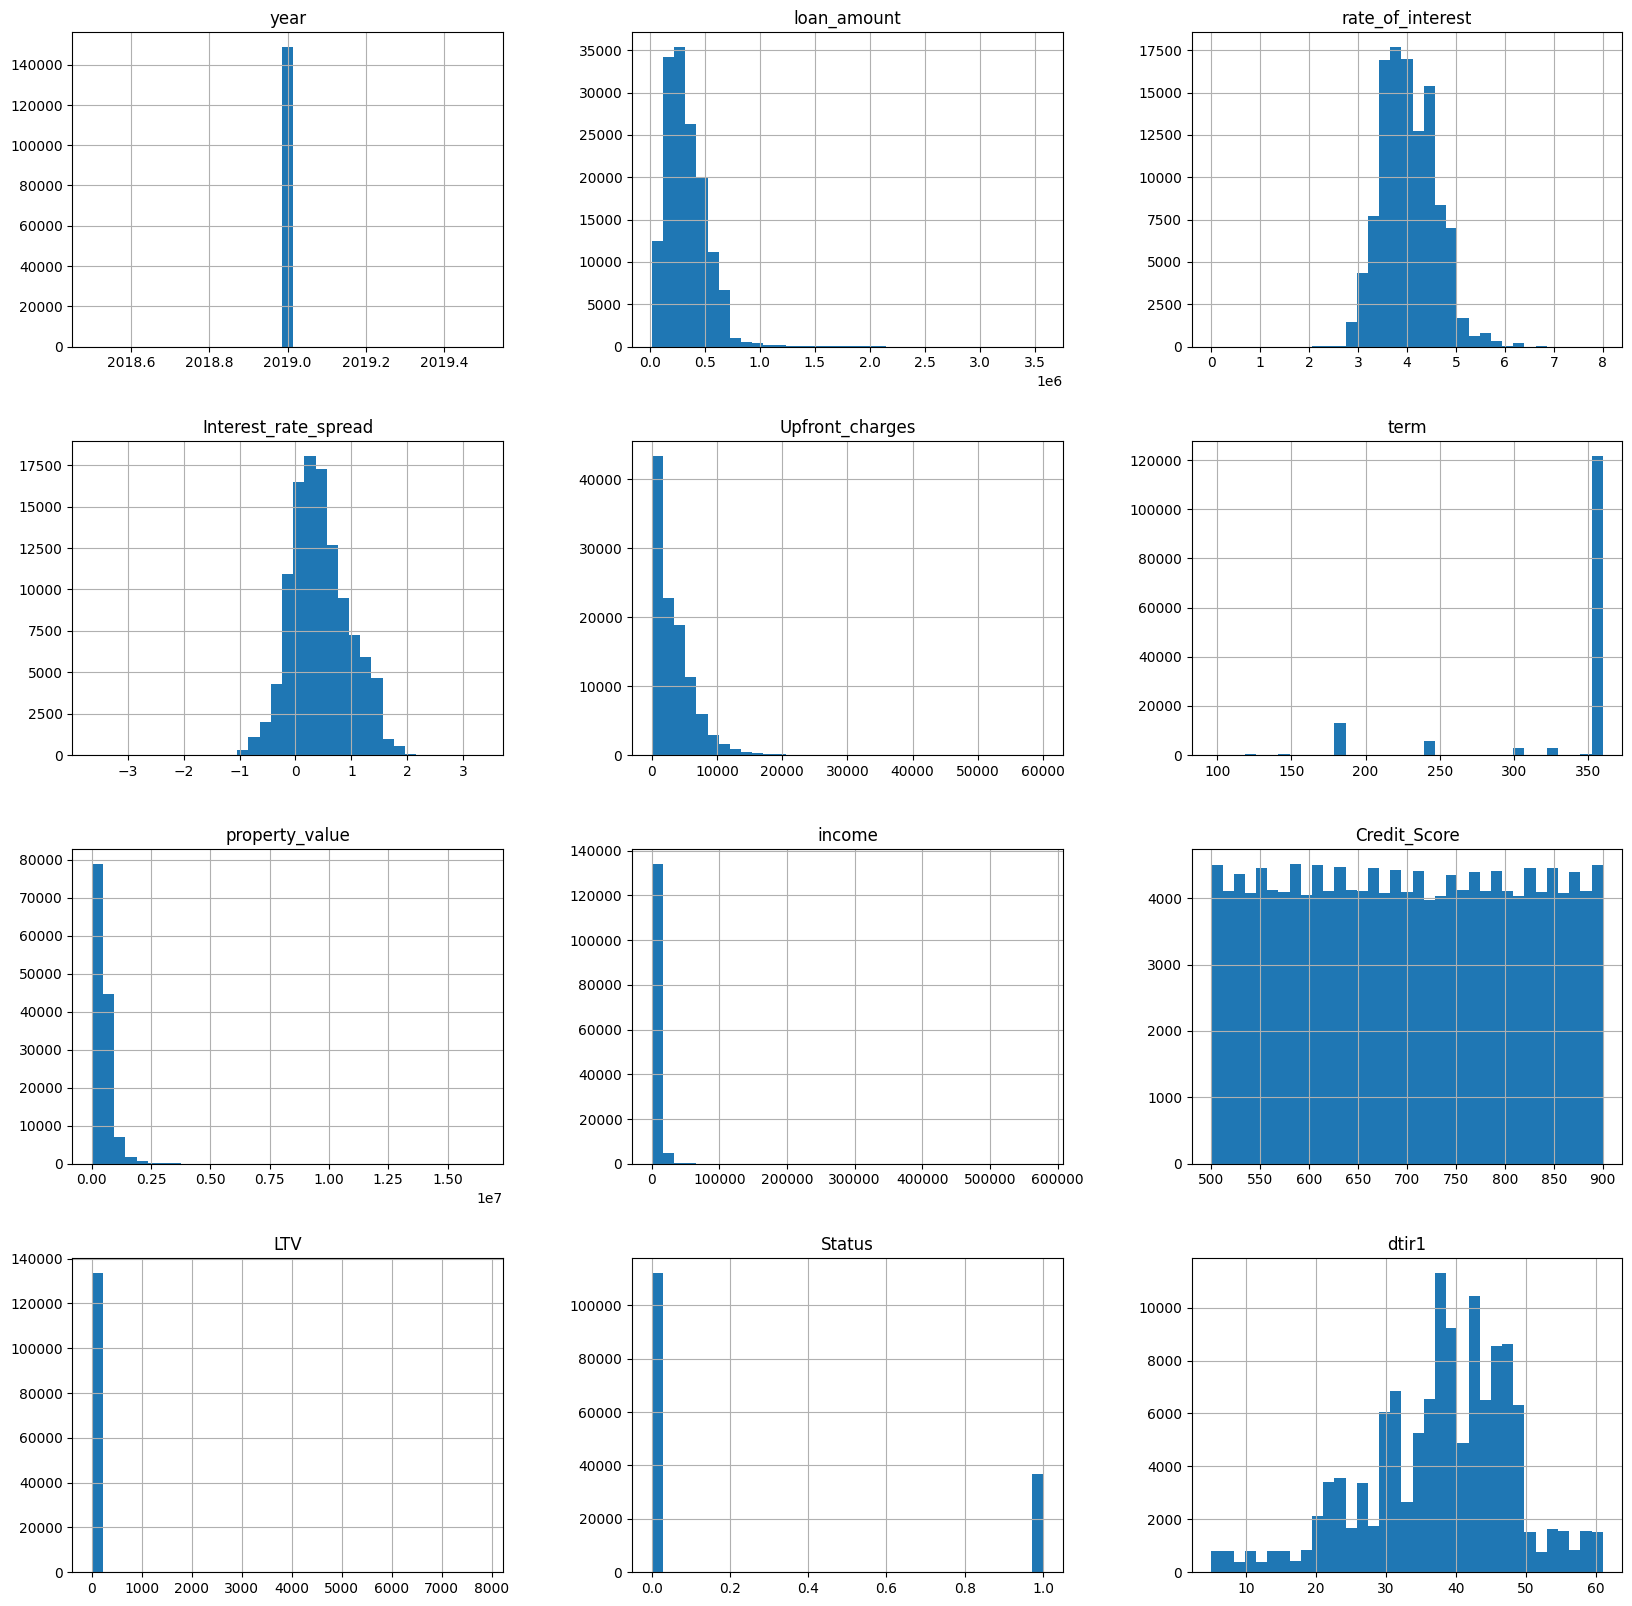

In [7]:
df[numeryczne].hist(bins = 35, figsize=(20, 20))
plt.show()

### Histogramy ilości nienumerycznych danych

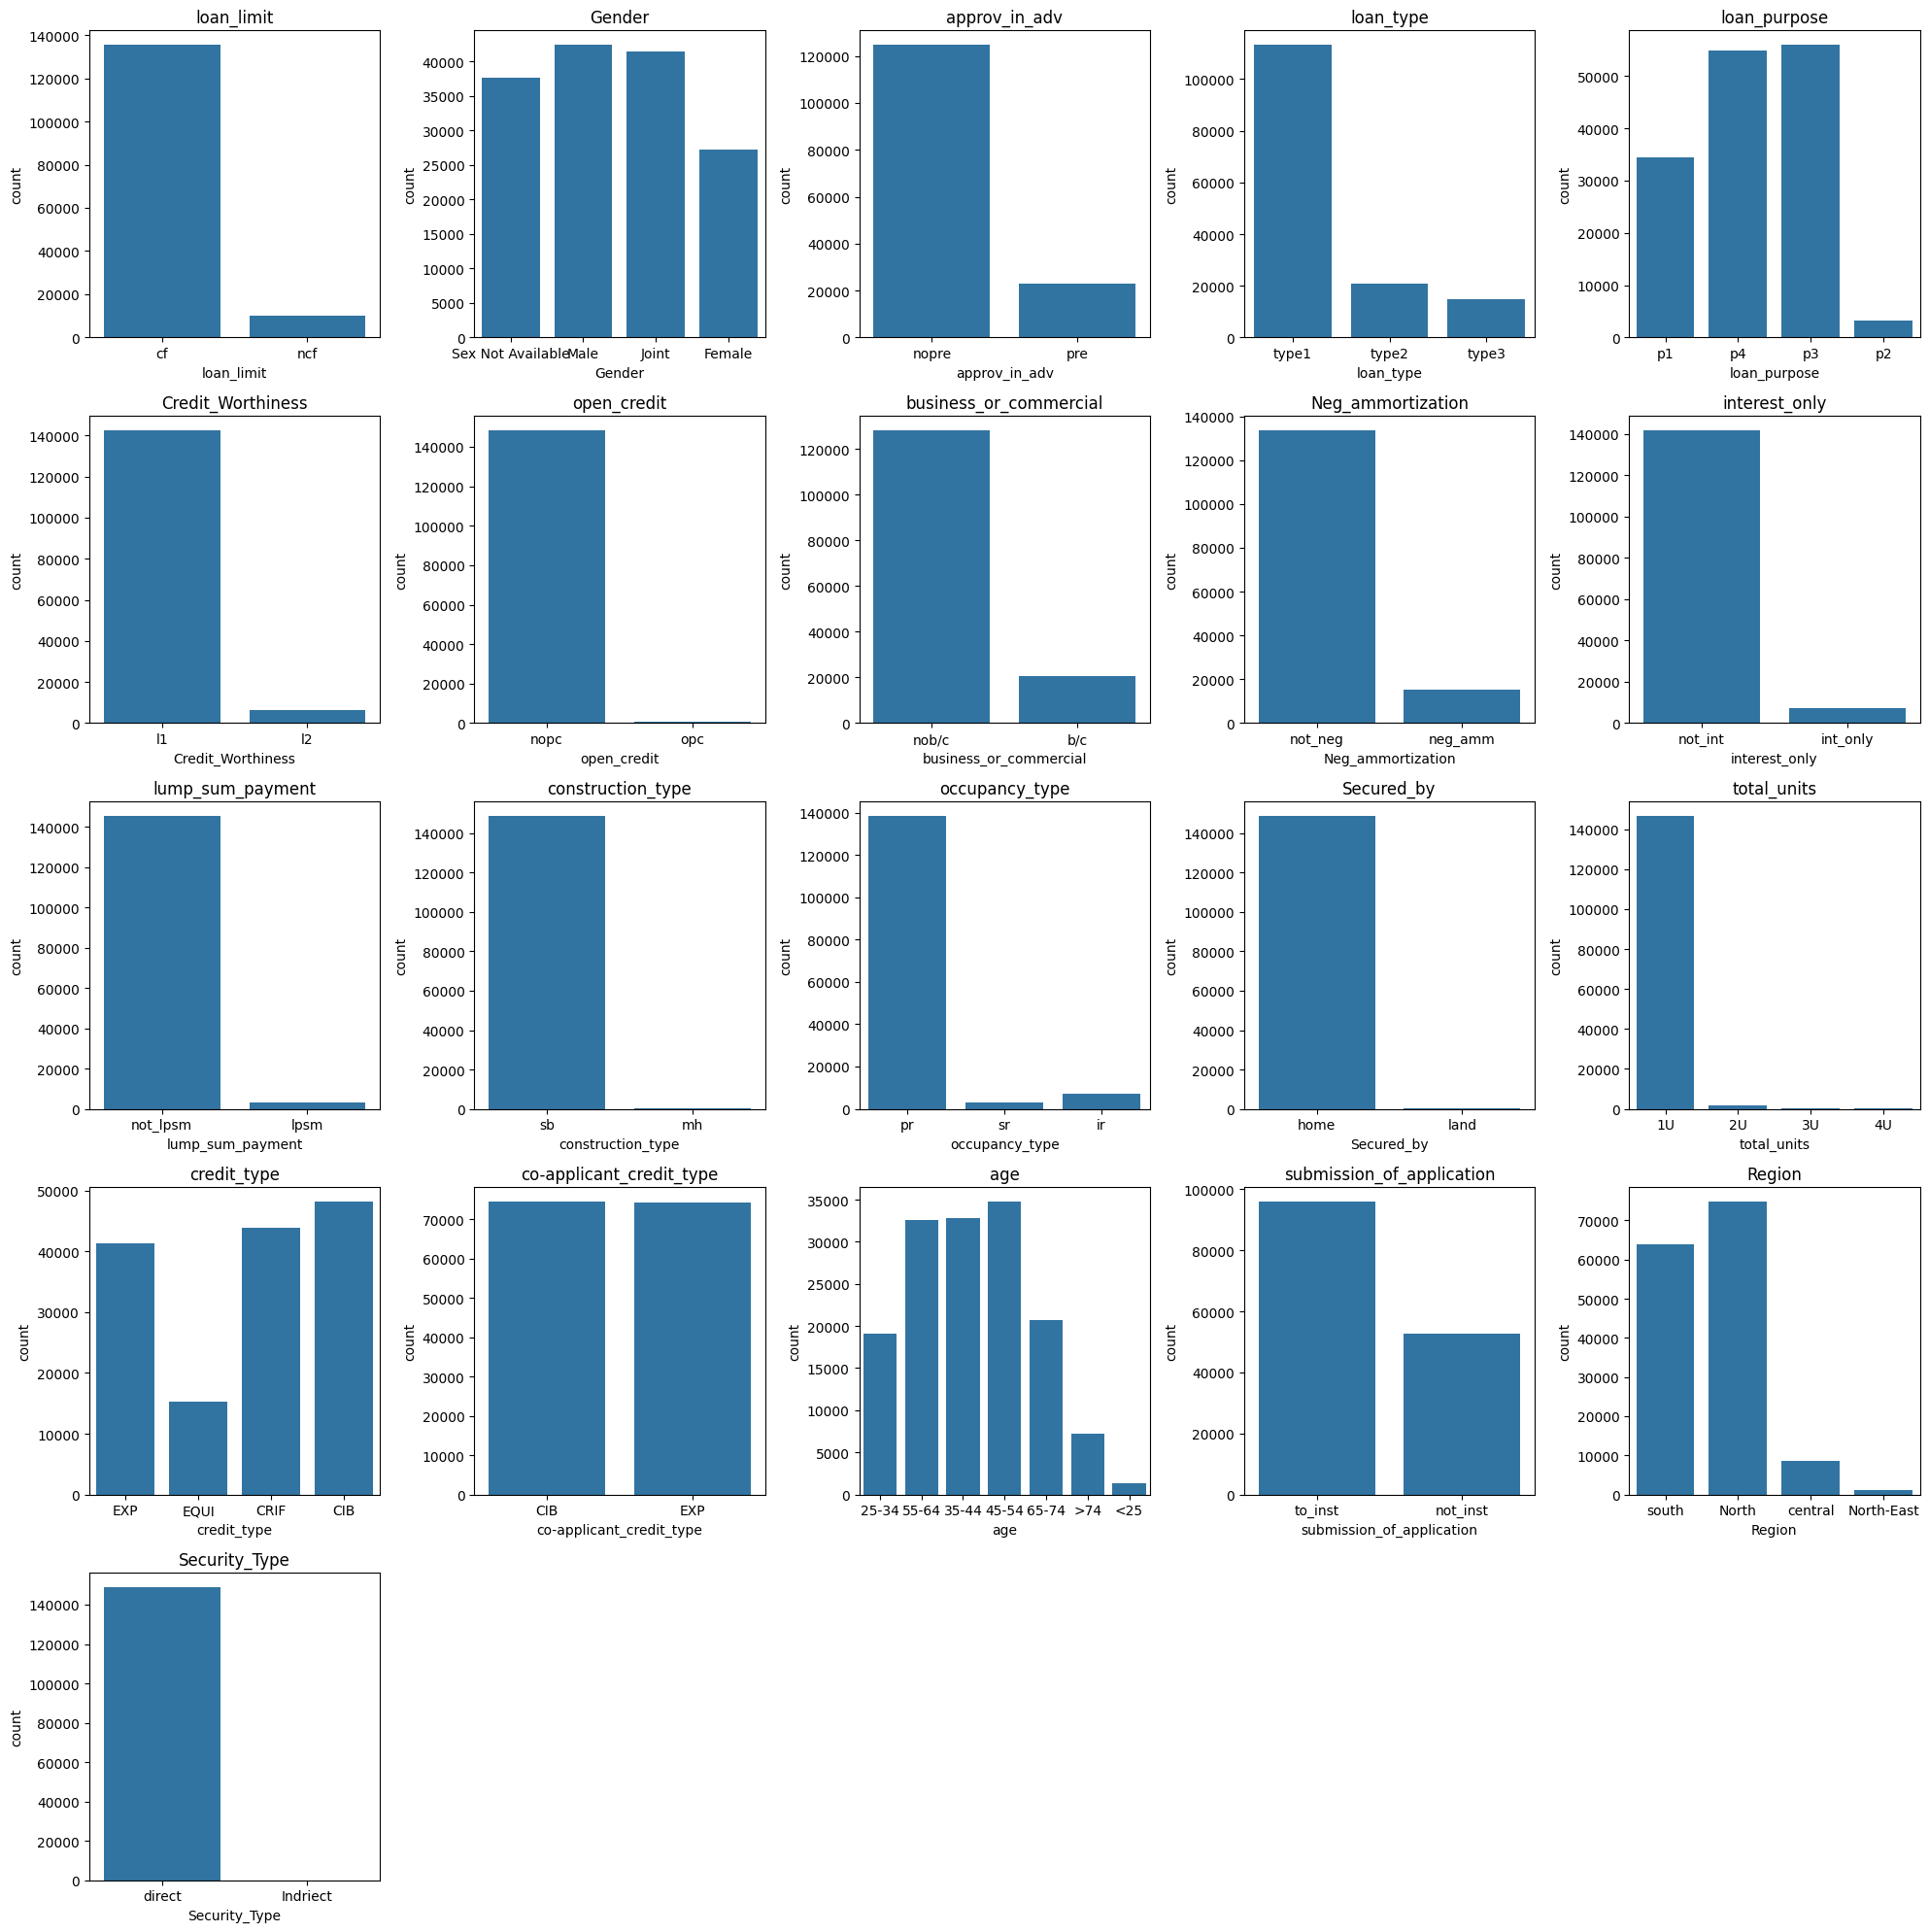

In [8]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(nie_numeryczne, 1):
    plt.subplot(5,5, i)
    sns.countplot(data=n_num_data, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

### Procentowy rozkład dłużników ze względu na dane

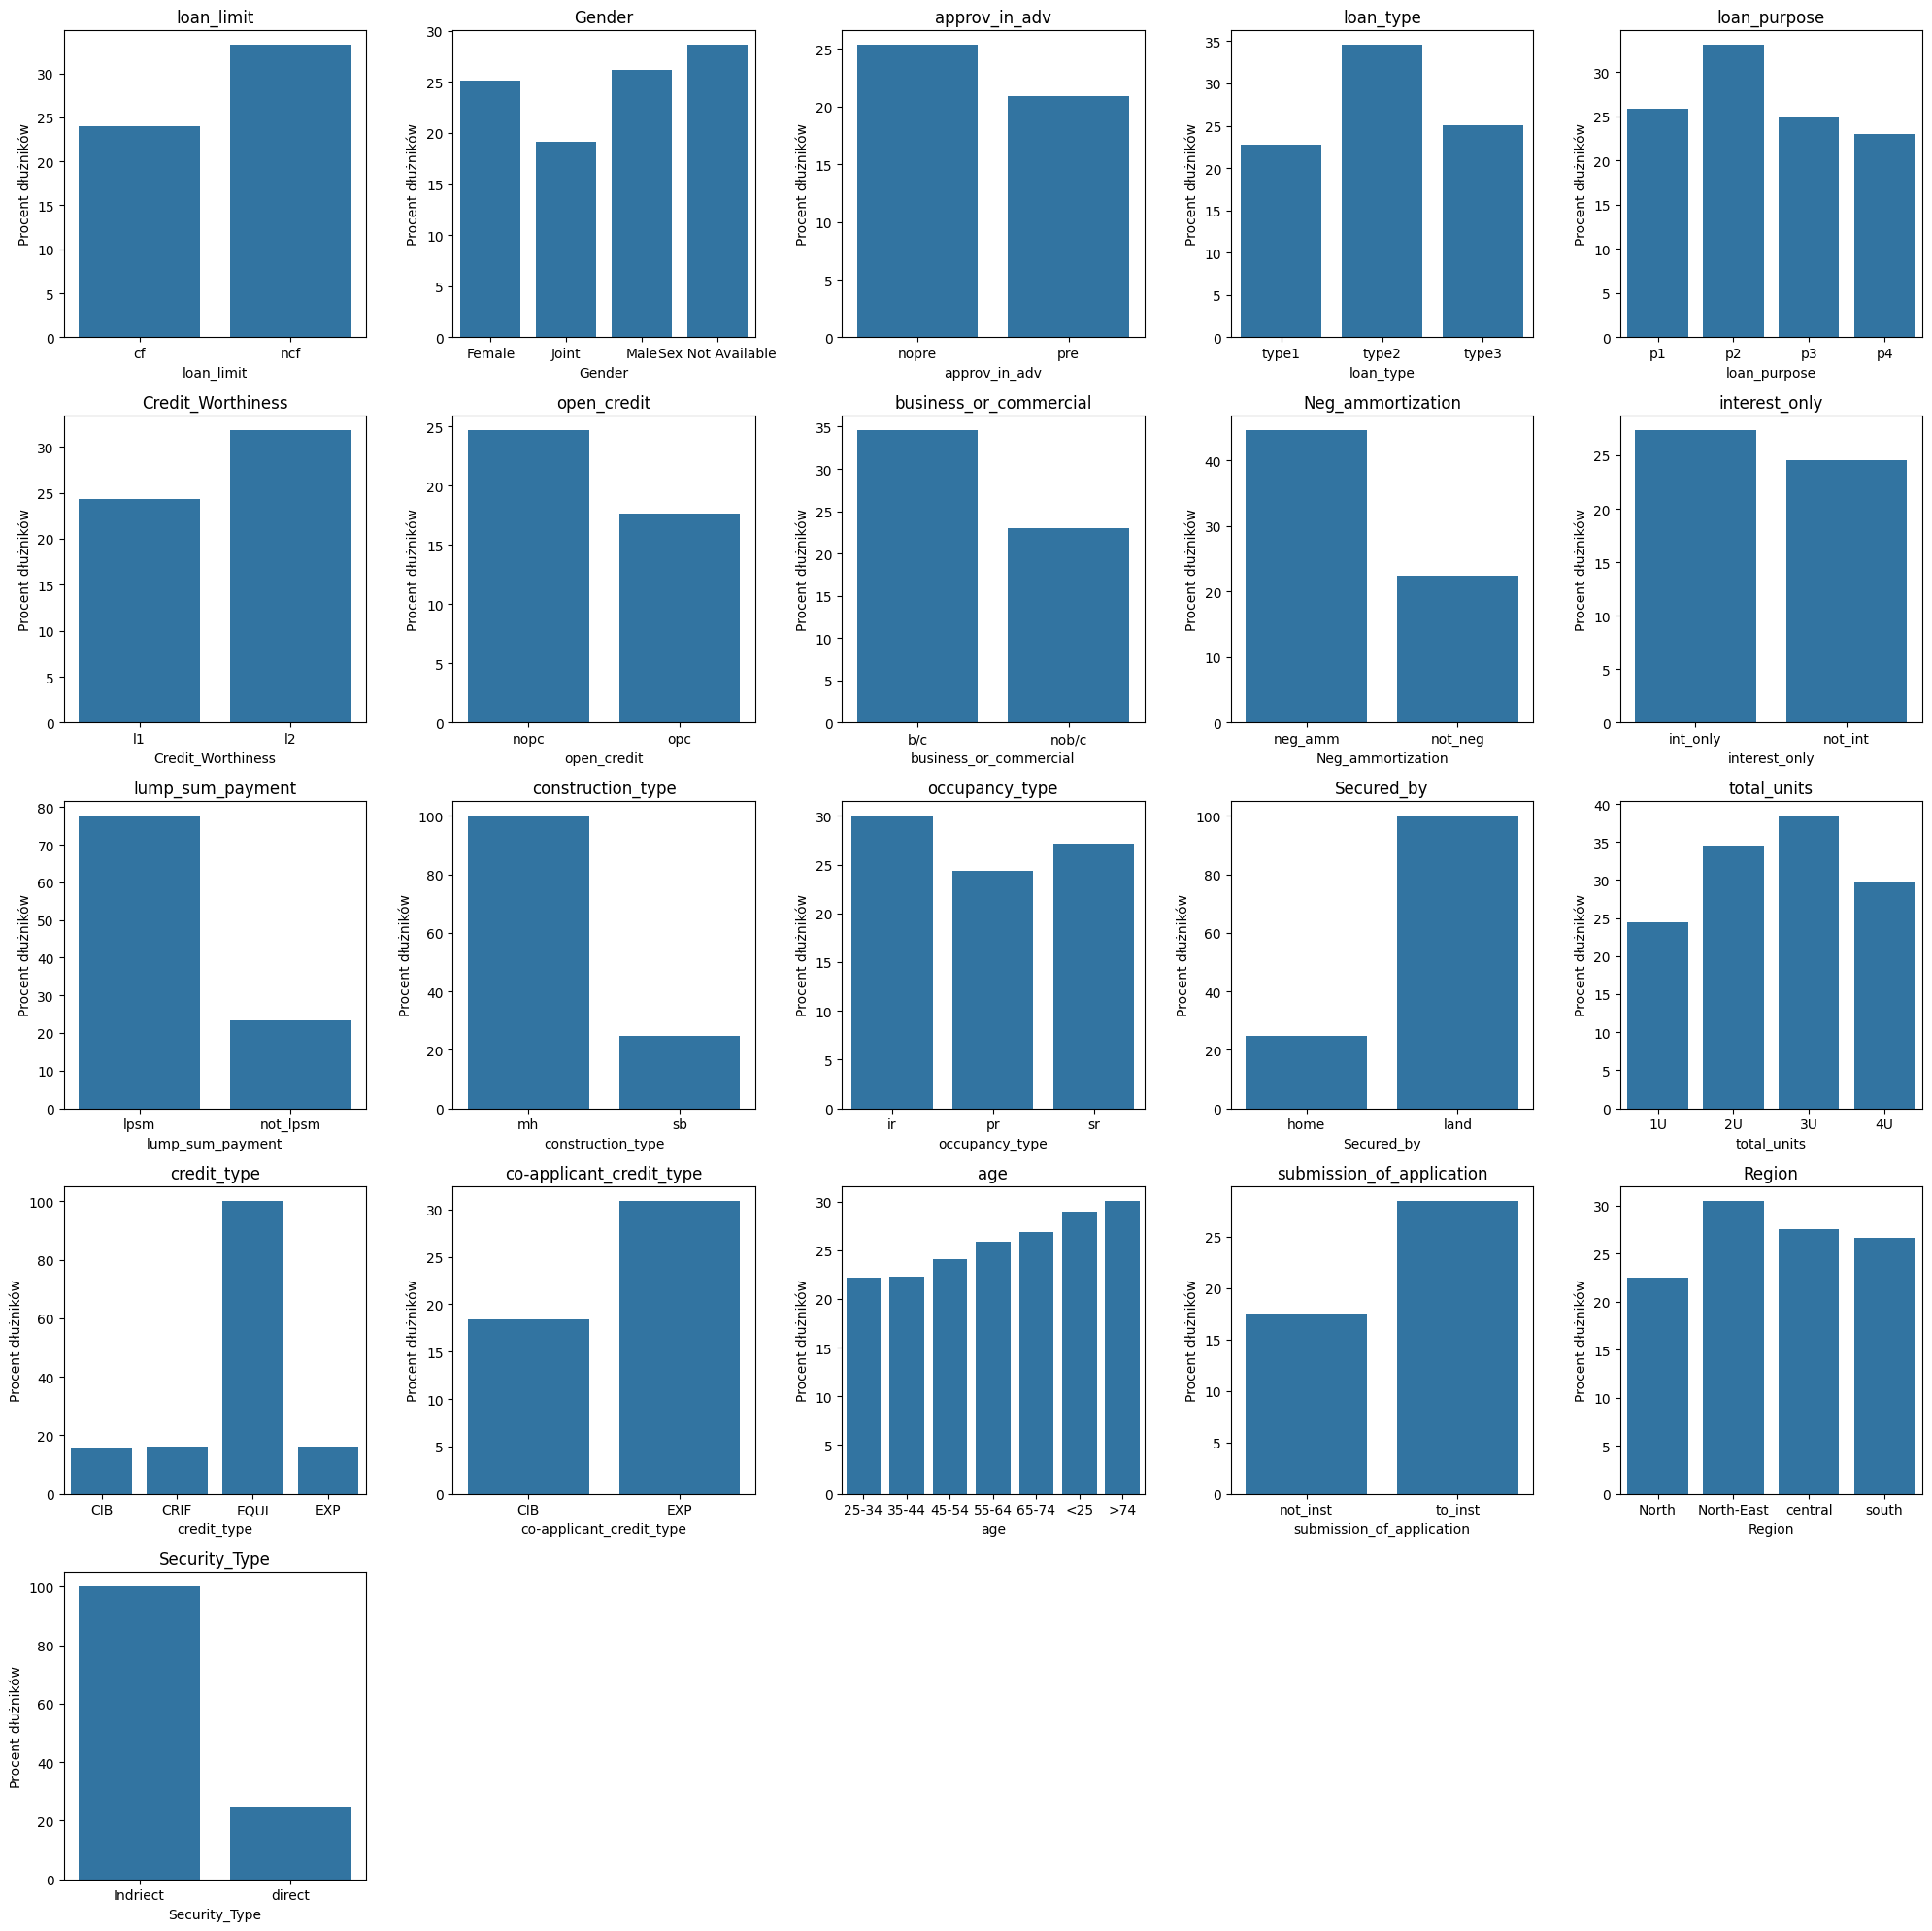

In [9]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(nie_numeryczne, 1):
    procent_dluznikow = 100 * df.groupby(col)['Status'].mean()
    plt.subplot(5, 5, i)
    wykres = sns.barplot(x = procent_dluznikow.index, y = procent_dluznikow.values)
    plt.title(col)
    plt.ylabel('Procent dłużników')

plt.tight_layout()
plt.show()



### Rozkład danych względem wieku

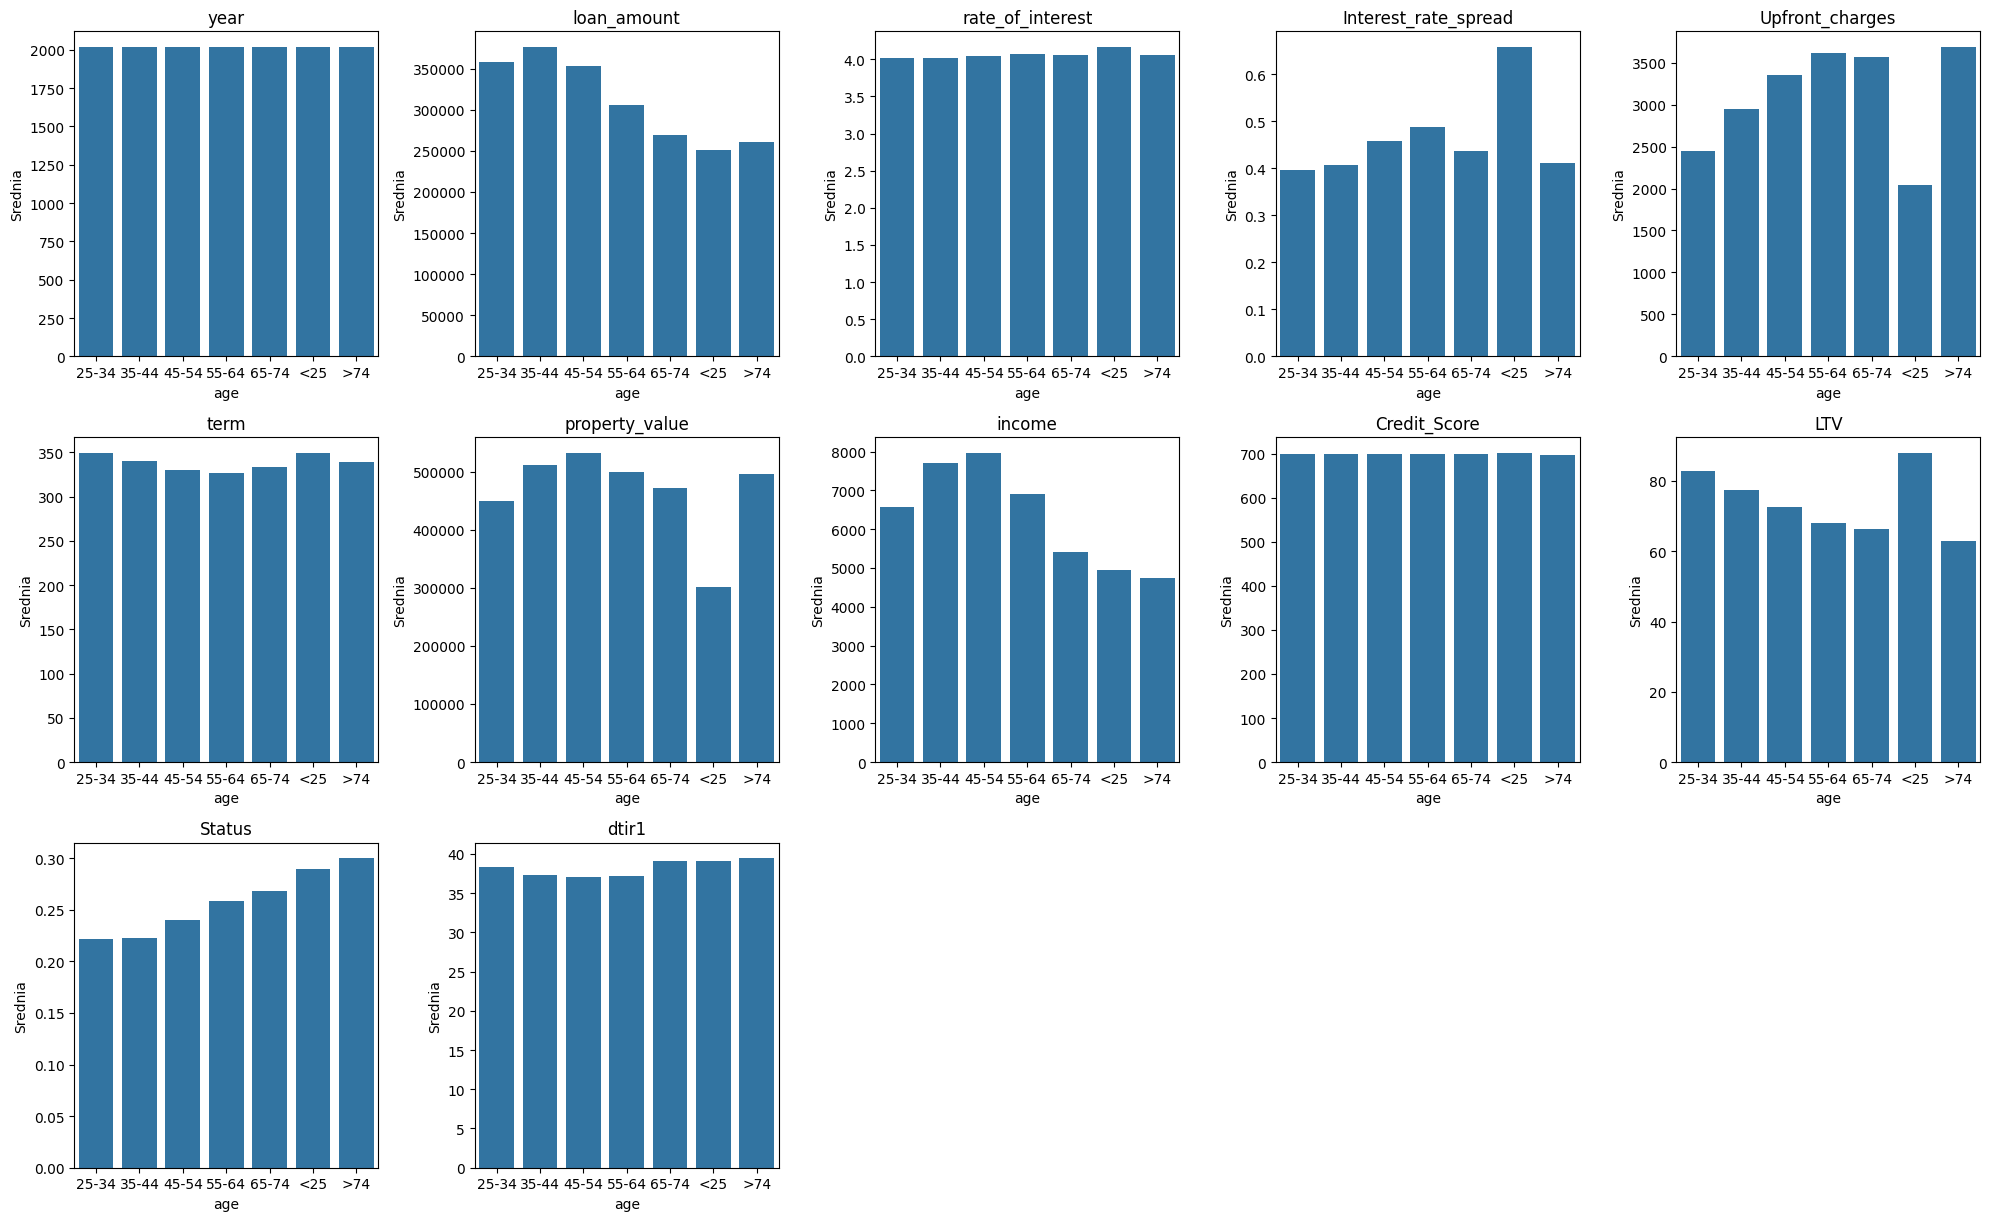

In [10]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(numeryczne, 1):
    srednia = df.groupby('age')[col].mean()
    plt.subplot(5, 5, i)
    wykres = sns.barplot(x = srednia.index, y = srednia.values)
    plt.title(col)
    plt.ylabel('Srednia')

plt.tight_layout()
plt.show()


### Rozkład danych względem płci

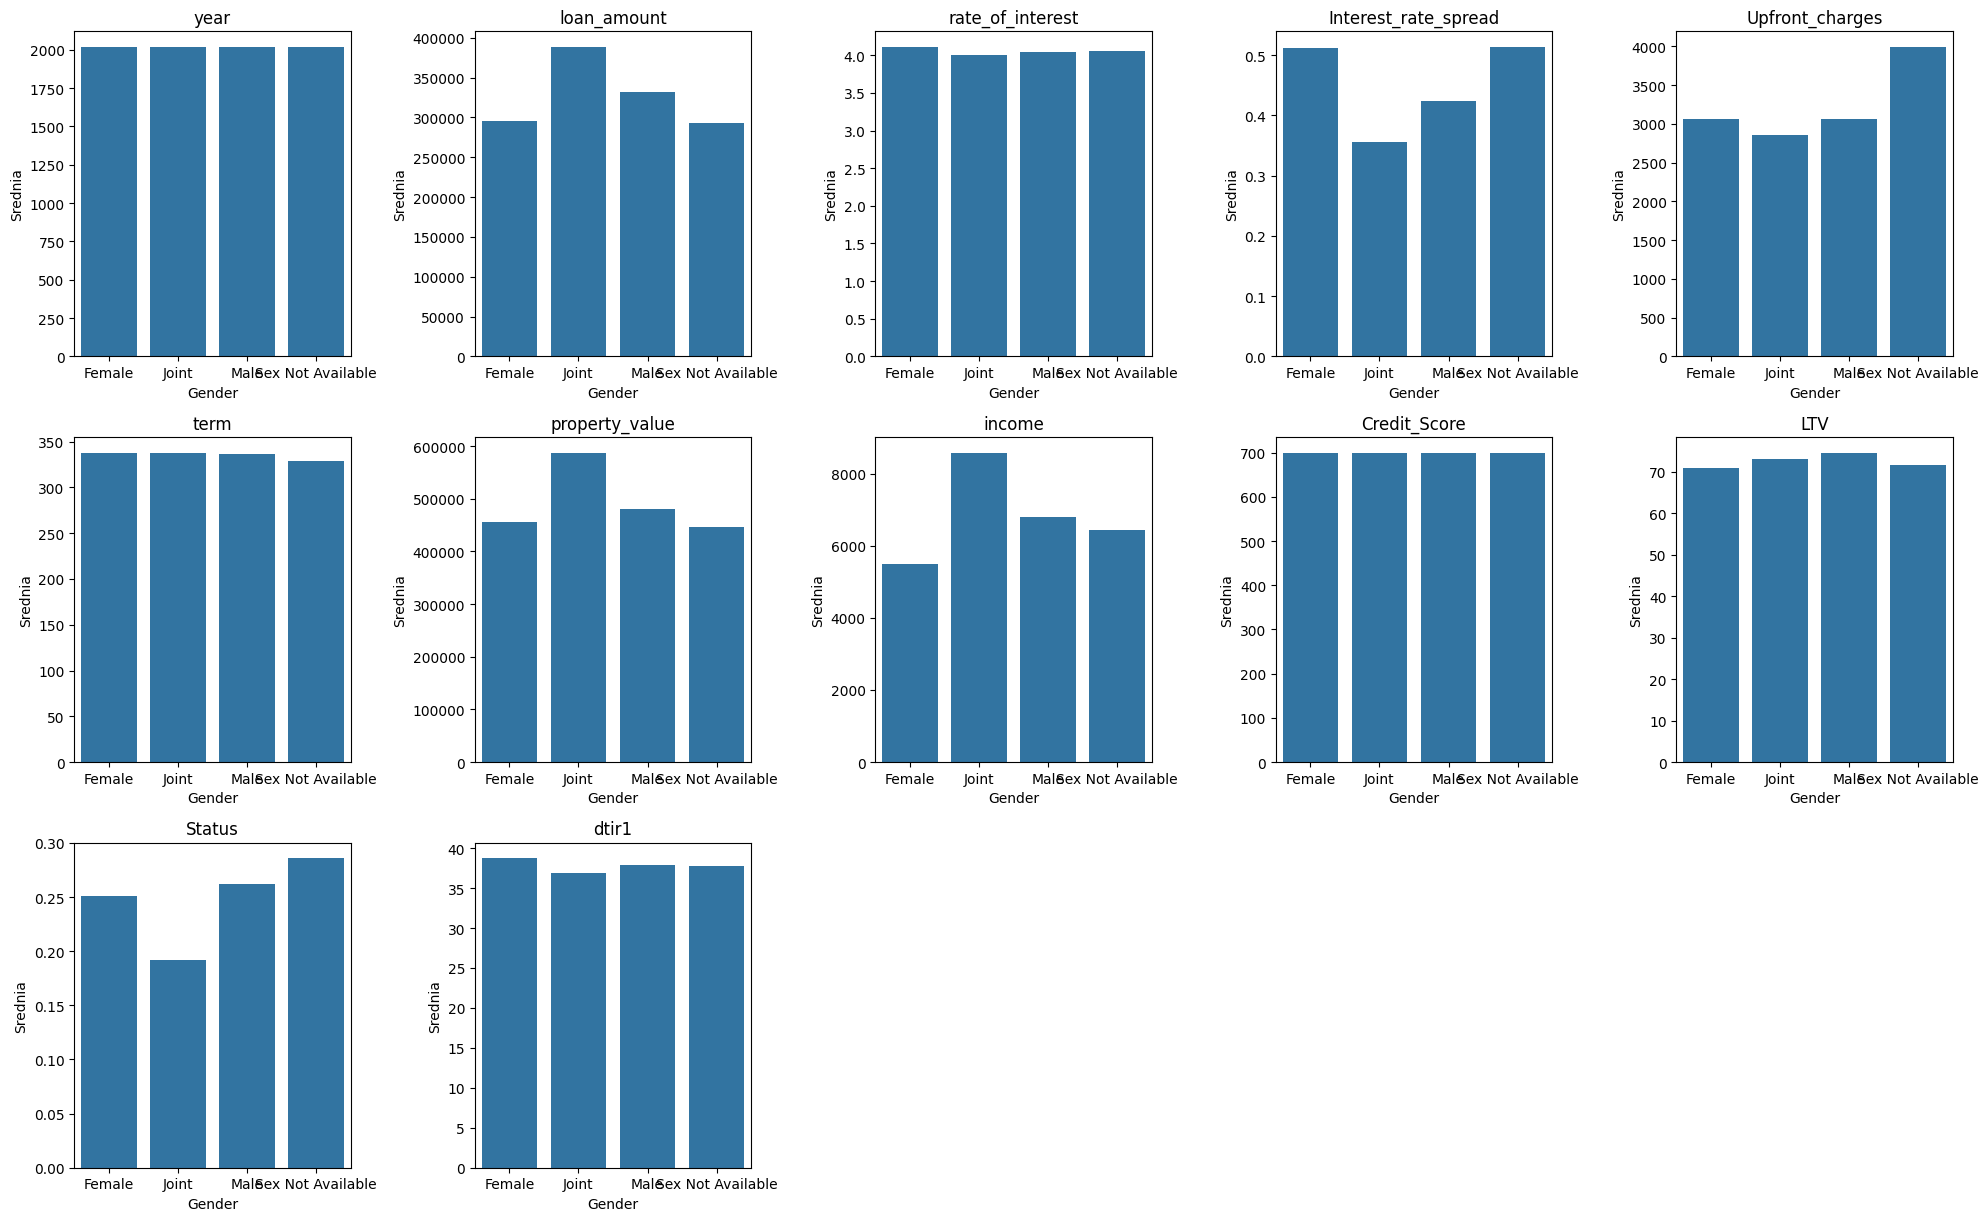

In [11]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(numeryczne, 1):
    srednia = df.groupby('Gender')[col].mean()
    plt.subplot(5, 5, i)
    wykres = sns.barplot(x = srednia.index, y = srednia.values)
    plt.title(col)
    plt.ylabel('Srednia')

plt.tight_layout()
plt.show()


Rozkład danych względem rodzaju pożyczkobiorcy

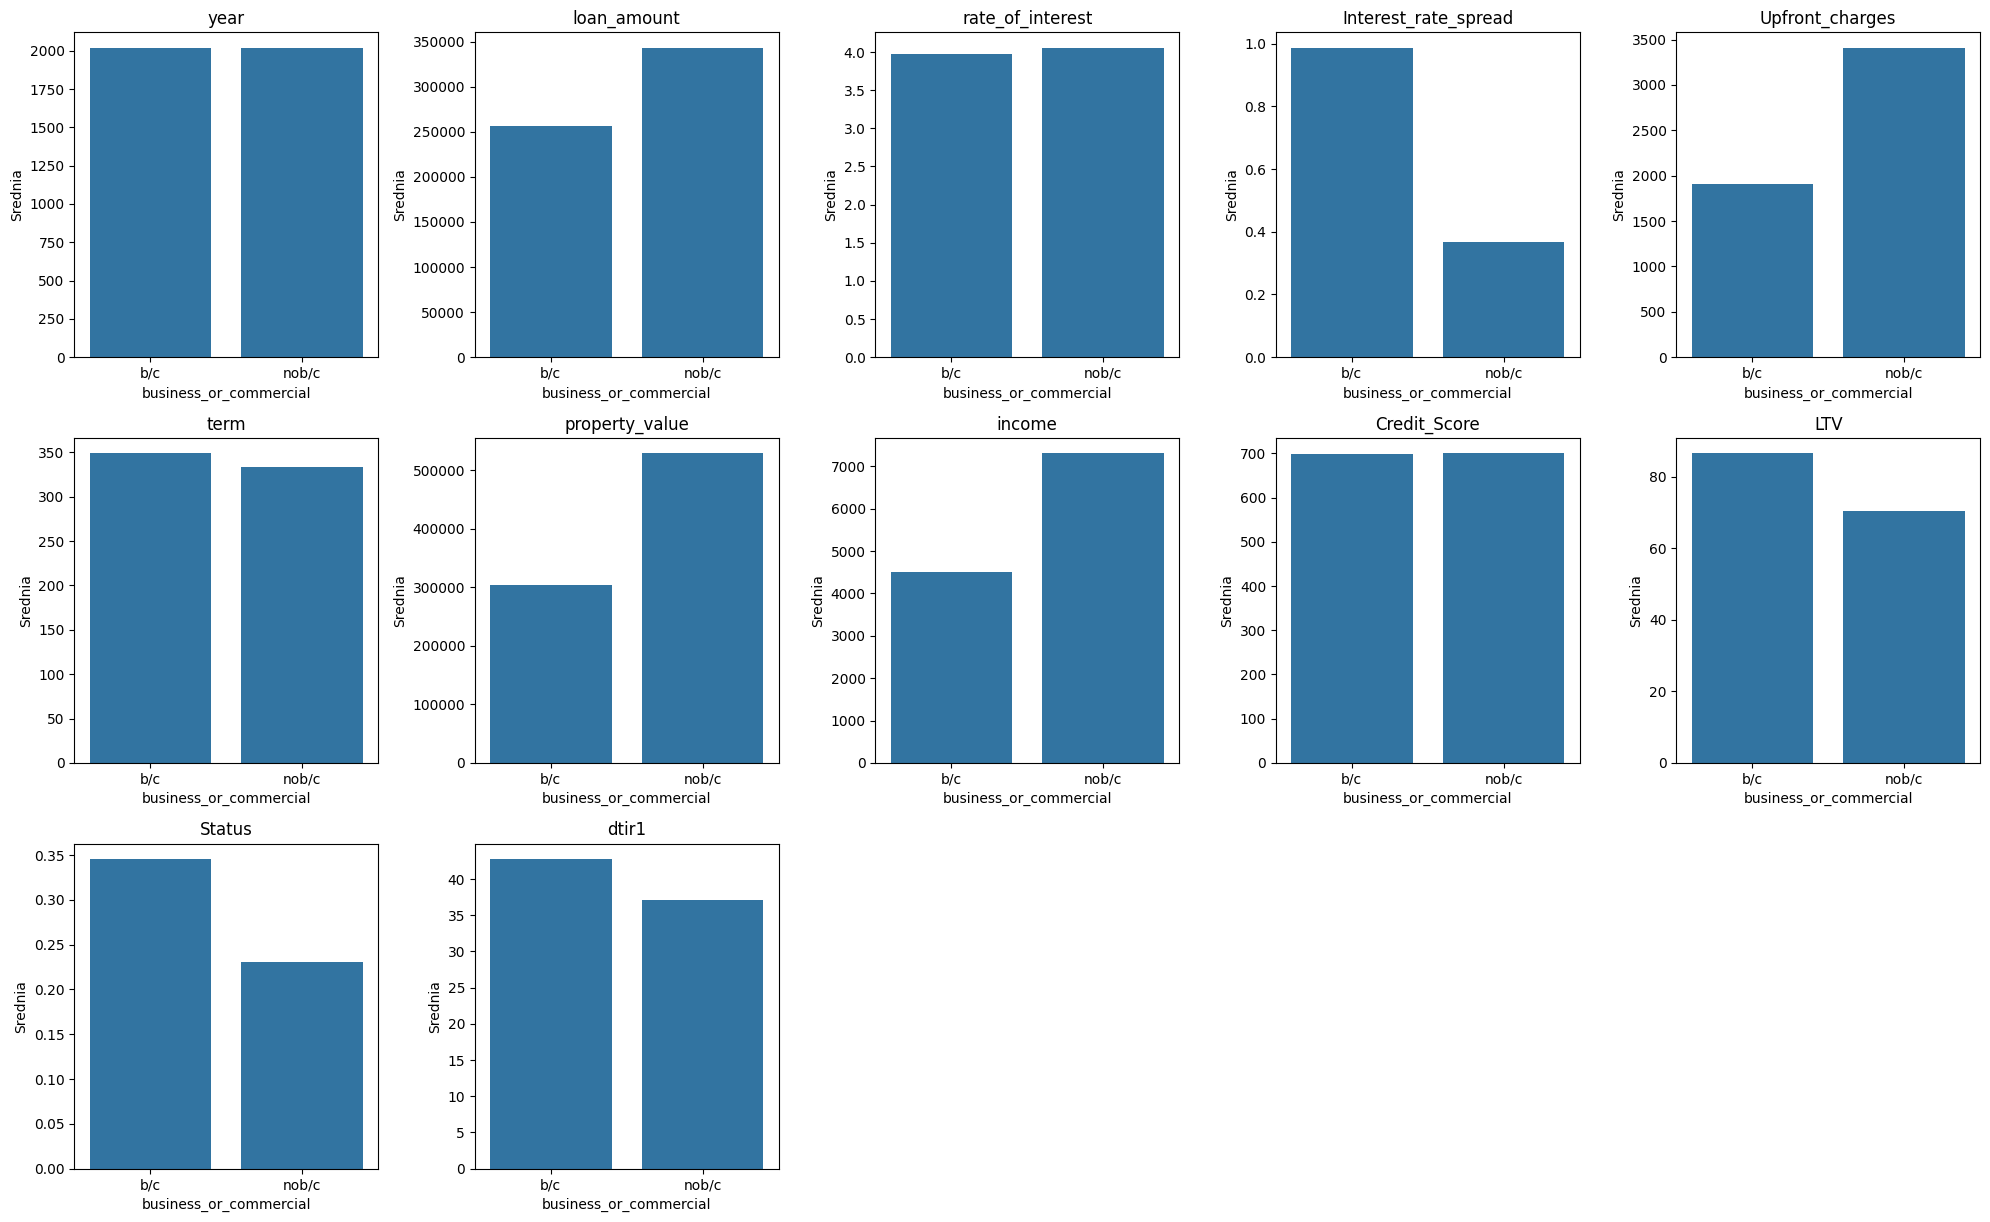

In [12]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(numeryczne, 1):
    srednia = df.groupby('business_or_commercial')[col].mean()
    plt.subplot(5, 5, i)
    wykres = sns.barplot(x = srednia.index, y = srednia.values)
    plt.title(col)
    plt.ylabel('Srednia')

plt.tight_layout()
plt.show()


## Uzupełnianie brakujących danych

In [13]:
brakujace_num = ['term','income','property_value','LTV','dtir1','rate_of_interest','Interest_rate_spread' ,'Upfront_charges']
brakujace_n_num = ['Neg_ammortization','age','loan_purpose','submission_of_application','approv_in_adv','loan_limit']

for col in brakujace_num:
    df[col]=df[col].fillna(df[col].mean())

for col in brakujace_n_num:
    df[col]=df[col].fillna(df[col].mode()[0])